<a href="https://colab.research.google.com/github/CorralesK/Lab04_EDA/blob/main/lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 04 - EDA**

In [88]:
# Cargando las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis, linregress

## 1. Carga y comprensión inicial de los datos

In [124]:
# Ruta del archivo
filepath = 'https://raw.githubusercontent.com/CorralesK/Lab04_EDA/main/datos.csv' # Me falta que se cargue de git

# Cargar el dataset
df = pd.read_csv(filepath)

In [125]:
# Verificar el formato de las columnas. Comprobar el tipo de cada
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnig

In [126]:
# Explorar las primeras filas
print(df.head())

  churn  accountlength internationalplan voicemailplan  numbervmailmessages  \
0    No            128                no           yes                   25   
1    No            107                no           yes                   26   
2    No            137                no            no                    0   
3    No             84               yes            no                    0   
4    No             75               yes            no                    0   

   totaldayminutes  totaldaycalls  totaldaycharge  totaleveminutes  \
0            265.1            110           45.07            197.4   
1            161.6            123           27.47            195.5   
2            243.4            114           41.38            121.2   
3            299.4             71           50.90             61.9   
4            166.7            113           28.34            148.3   

   totalevecalls  totalevecharge  totalnightminutes  totalnightcalls  \
0             99           16.78

In [127]:
# Observar la cantidad de filas y columnas
print(f"Dimensiones del dataset (filas, columnas): {df.shape}")

Dimensiones del dataset (filas, columnas): (5000, 18)


## 2. Limpiar y preparar los datos

In [128]:
# Identificar y tratar valores nulos
print("Valores nulos por columna:")
df.isnull().sum()

Valores nulos por columna:


,0
churn,0
accountlength,0
internationalplan,0
voicemailplan,0
numbervmailmessages,0
totaldayminutes,0
totaldaycalls,0
totaldaycharge,0
totaleveminutes,0
totalevecalls,0


In [129]:
# Eliminar duplicados
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Filas eliminadas por duplicados: {initial_rows - df.shape[0]}")

Filas eliminadas por duplicados: 0


In [130]:
# Revisar valores atípicos

# Función reutilizable para identificar atípicos con el método IQR.
def identificar_atipicos(data, columna, factor=1.5):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    mediana = data[columna].median()
    valor_minimo = data[columna].min()
    valor_maximo = data[columna].max()

    print(f"\nResumen estadístico para {col}:")
    print(f"- Primer cuartil (Q1): {Q1}")
    print(f"- Tercer cuartil (Q3): {Q3}")
    print(f"- Rango intercuartílico (IQR): {IQR}")
    print(f"- Mediana: {mediana}")
    print(f"- Valor mínimo: {valor_minimo}")
    print(f"- Valor máximo: {valor_maximo}\n")

    # Sacar cuales son los limites
    limite_inferior = Q1 - (factor * IQR)
    limite_superior = Q3 + (factor * IQR)

    return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

In [131]:
# - Identificar atípicos en todas las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    atipicos = identificar_atipicos(df, col)
    print(f"- Valores atípicos: {len(atipicos)} registros")
    if len(atipicos) > 0:
        print(f"- Rango de valores atípicos: {atipicos[col].min()} a {atipicos[col].max()}")


Resumen estadístico para accountlength:
- Primer cuartil (Q1): 73.0
- Tercer cuartil (Q3): 127.0
- Rango intercuartílico (IQR): 54.0
- Mediana: 100.0
- Valor mínimo: 1
- Valor máximo: 243

- Valores atípicos: 24 registros
- Rango de valores atípicos: 209 a 243

Resumen estadístico para numbervmailmessages:
- Primer cuartil (Q1): 0.0
- Tercer cuartil (Q3): 17.0
- Rango intercuartílico (IQR): 17.0
- Mediana: 0.0
- Valor mínimo: 0
- Valor máximo: 52

- Valores atípicos: 60 registros
- Rango de valores atípicos: 43 a 52

Resumen estadístico para totaldayminutes:
- Primer cuartil (Q1): 143.7
- Tercer cuartil (Q3): 216.2
- Rango intercuartílico (IQR): 72.5
- Mediana: 180.1
- Valor mínimo: 0.0
- Valor máximo: 351.5

- Valores atípicos: 34 registros
- Rango de valores atípicos: 0.0 a 351.5

Resumen estadístico para totaldaycalls:
- Primer cuartil (Q1): 87.0
- Tercer cuartil (Q3): 113.0
- Rango intercuartílico (IQR): 26.0
- Mediana: 100.0
- Valor mínimo: 0
- Valor máximo: 165

- Valores atípic

In [132]:
# Convertir tipos de datos
# - Identificar las columnas y sus tipos actuales
df.dtypes

,0
churn,object
accountlength,int64
internationalplan,object
voicemailplan,object
numbervmailmessages,int64
totaldayminutes,float64
totaldaycalls,int64
totaldaycharge,float64
totaleveminutes,float64
totalevecalls,int64


In [133]:
# - Convertir tipos de datos
df['churn'] = df['churn'].astype('string')
df['internationalplan'] = df['internationalplan'].astype('string')
df['voicemailplan'] = df['voicemailplan'].astype('string')

In [134]:
# - Verificar los tipos de datos
df.dtypes

,0
churn,string[python]
accountlength,int64
internationalplan,string[python]
voicemailplan,string[python]
numbervmailmessages,int64
totaldayminutes,float64
totaldaycalls,int64
totaldaycharge,float64
totaleveminutes,float64
totalevecalls,int64


In [100]:
# Cambiar nombre de columnas si procede

# No es necesario cambiar nombres, pero si fuera el caso:
# df.rename(columns={"old_name": "new_name"}, inplace=True)
print("Nombres de columnas actuales:")
df.columns

Nombres de columnas actuales:


Index(['churn', 'accountlength', 'internationalplan', 'voicemailplan',
       'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
       'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge',
       'totalnightminutes', 'totalnightcalls', 'totalnightcharge',
       'totalintlminutes', 'totalintlcalls', 'totalintlcharge',
       'numbercustomerservicecalls'],
      dtype='object')

In [135]:
# Tratar con variables categóricas
categorical_cols = df.select_dtypes(include='string').columns

print("Variables categóricas identificadas:", categorical_cols.tolist())

for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())

Variables categóricas identificadas: ['churn', 'internationalplan', 'voicemailplan']

Distribución de churn:
churn
No     4293
Yes     707
Name: count, dtype: Int64

Distribución de internationalplan:
internationalplan
no     4527
yes     473
Name: count, dtype: Int64

Distribución de voicemailplan:
voicemailplan
no     3677
yes    1323
Name: count, dtype: Int64


## 3. Análisis univariado

In [136]:
# Estadísticas descriptivas
df.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


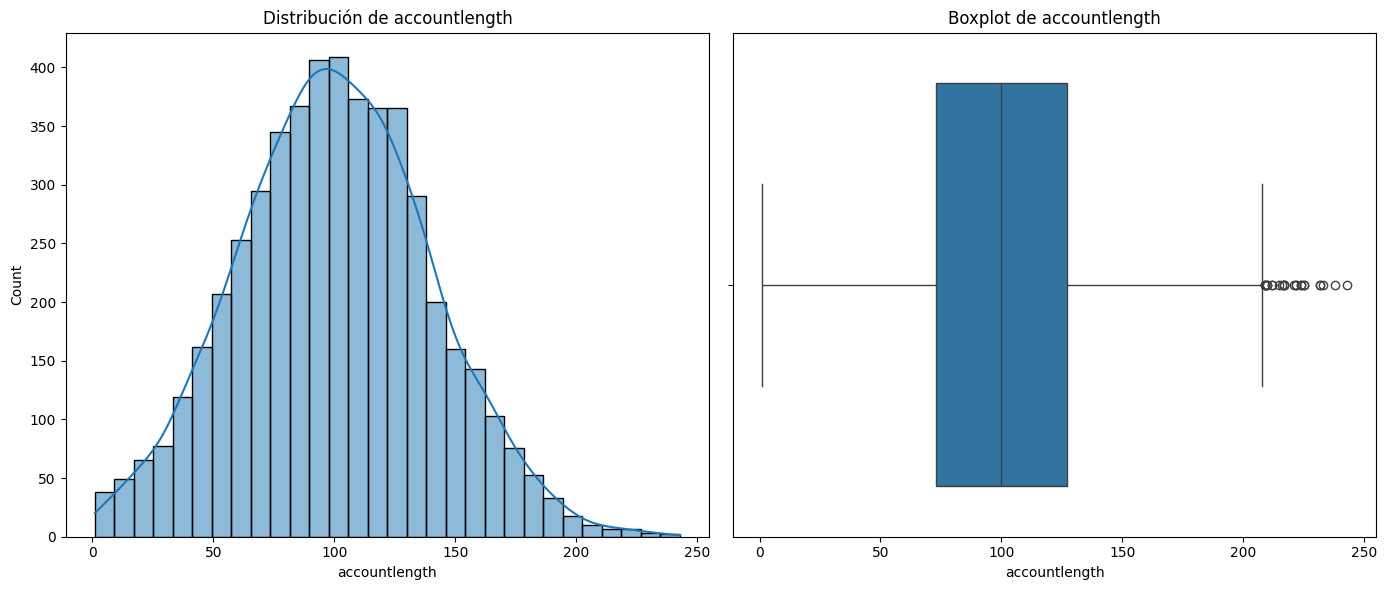

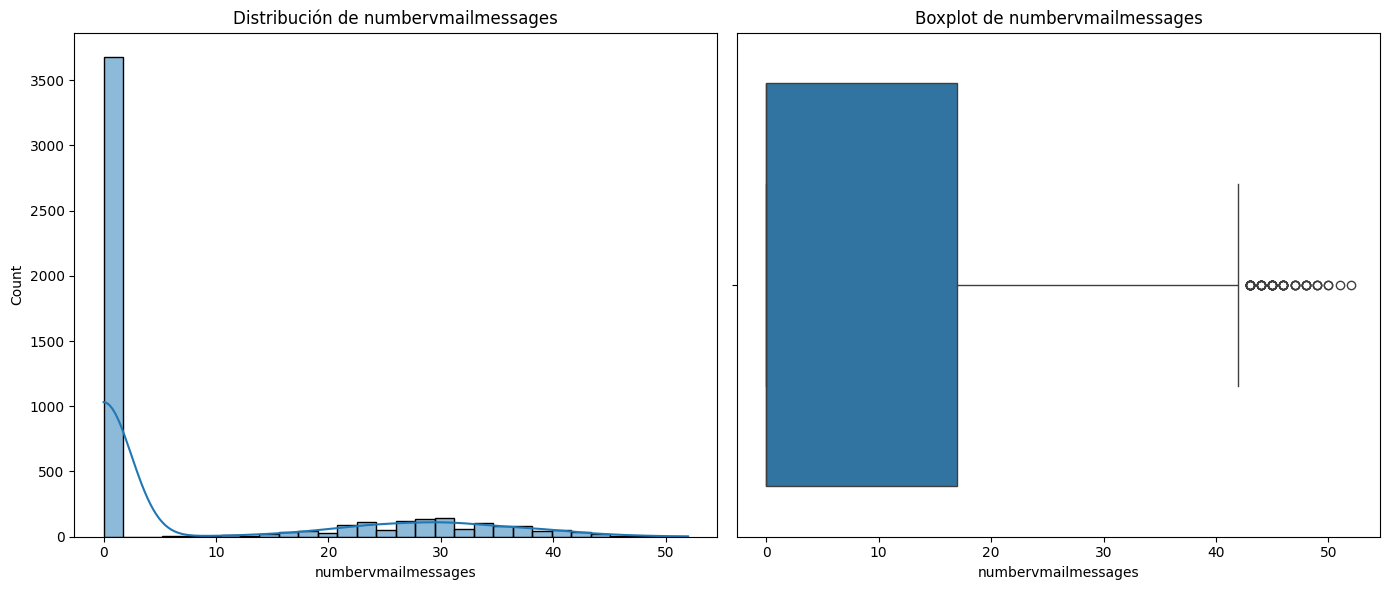

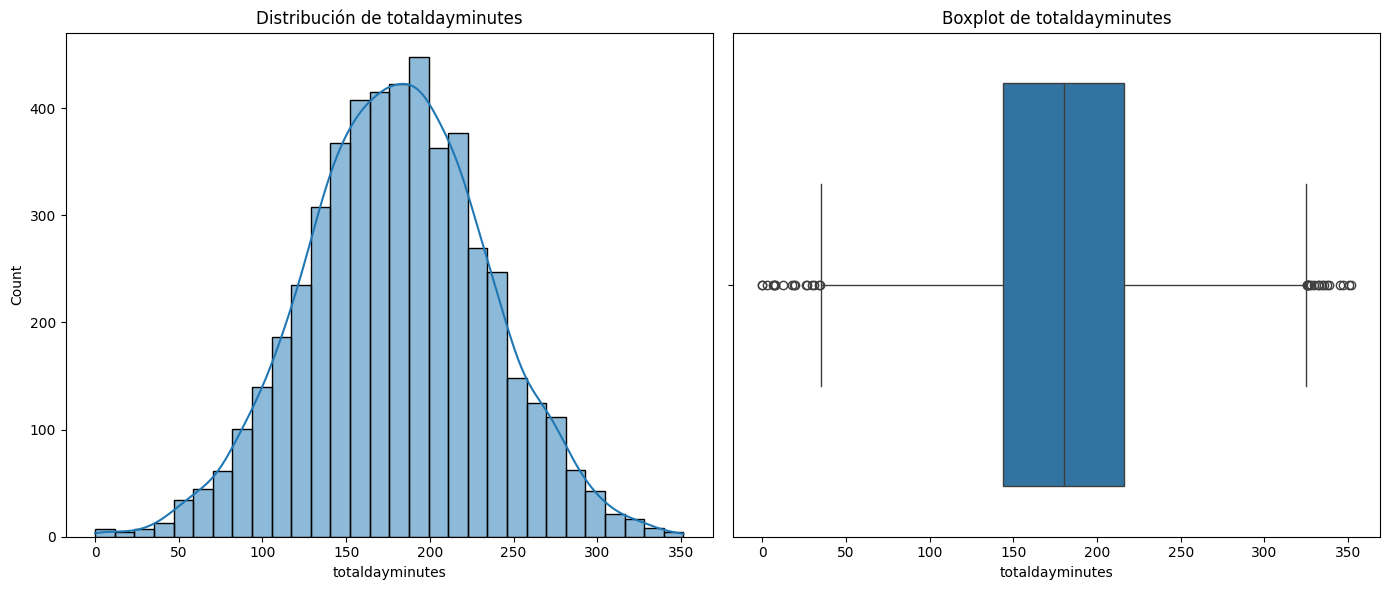

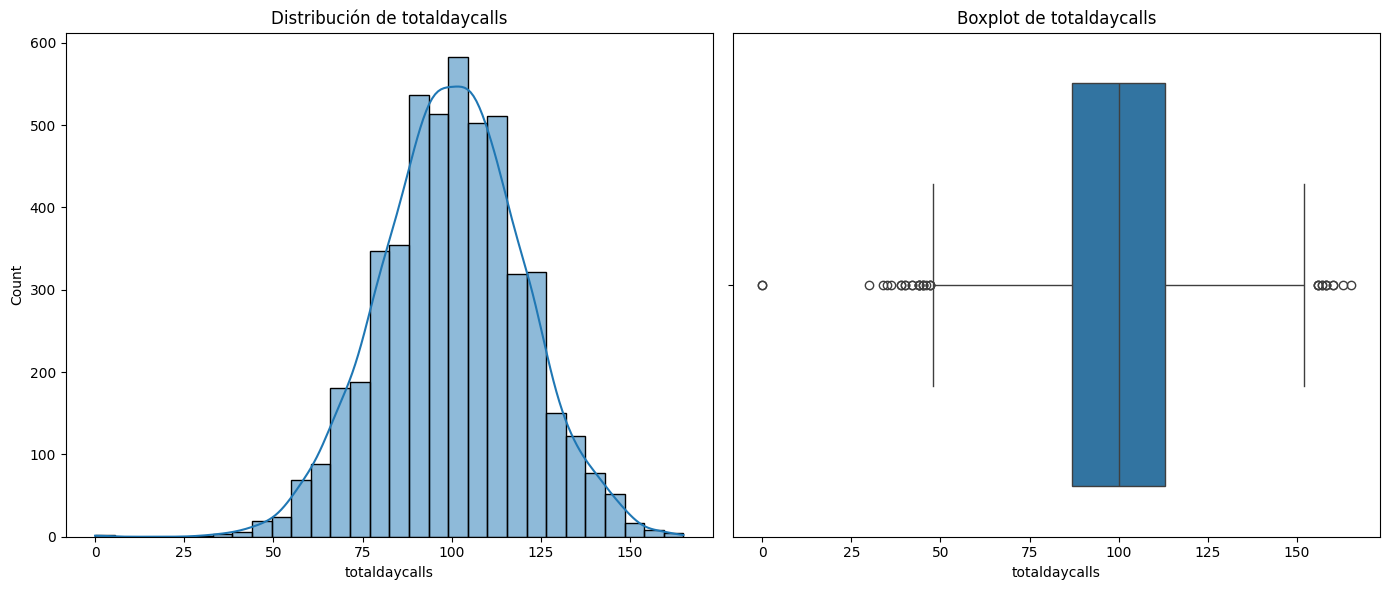

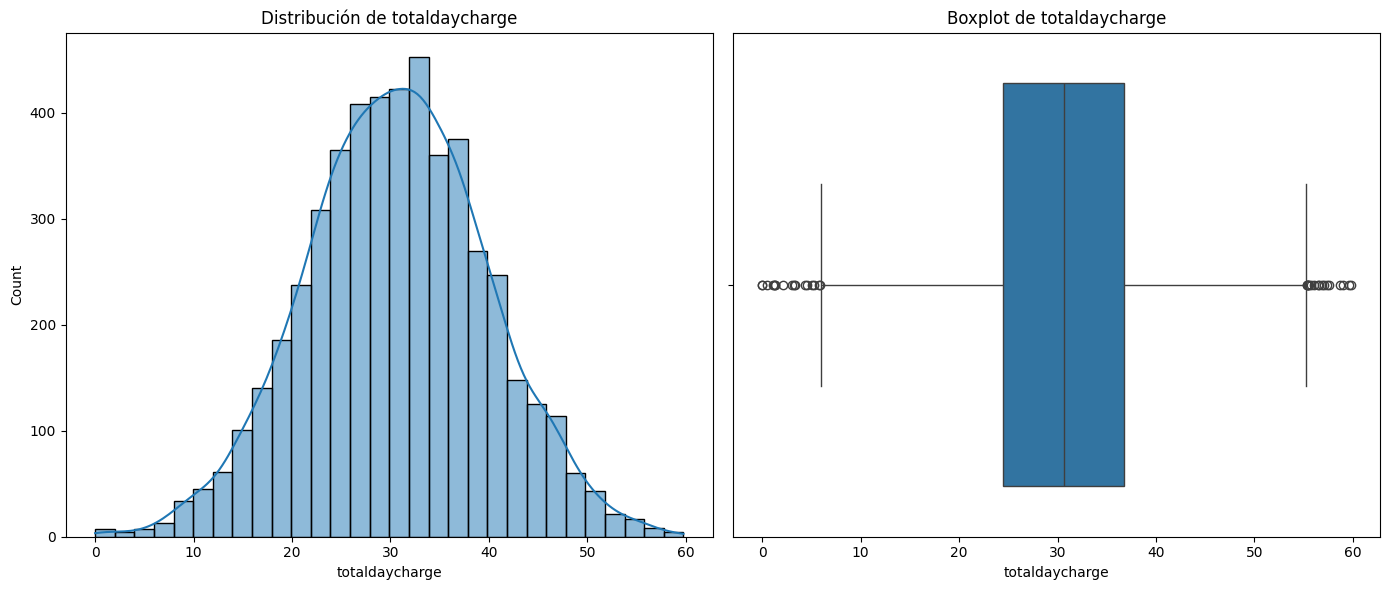

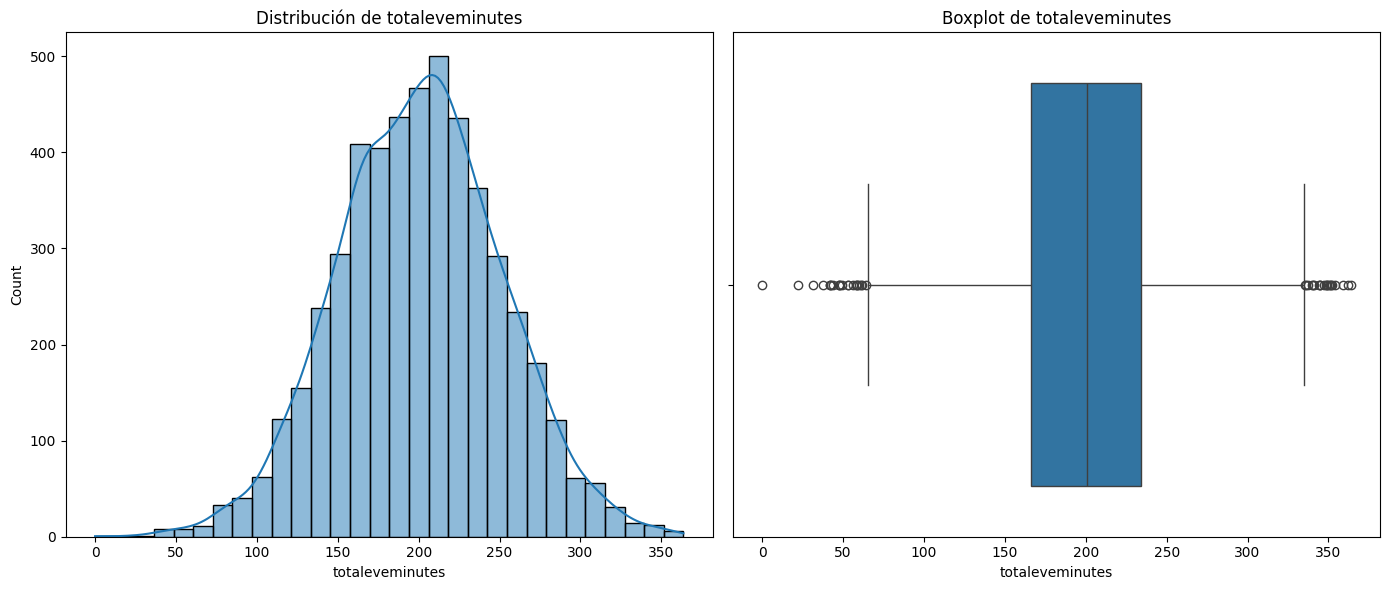

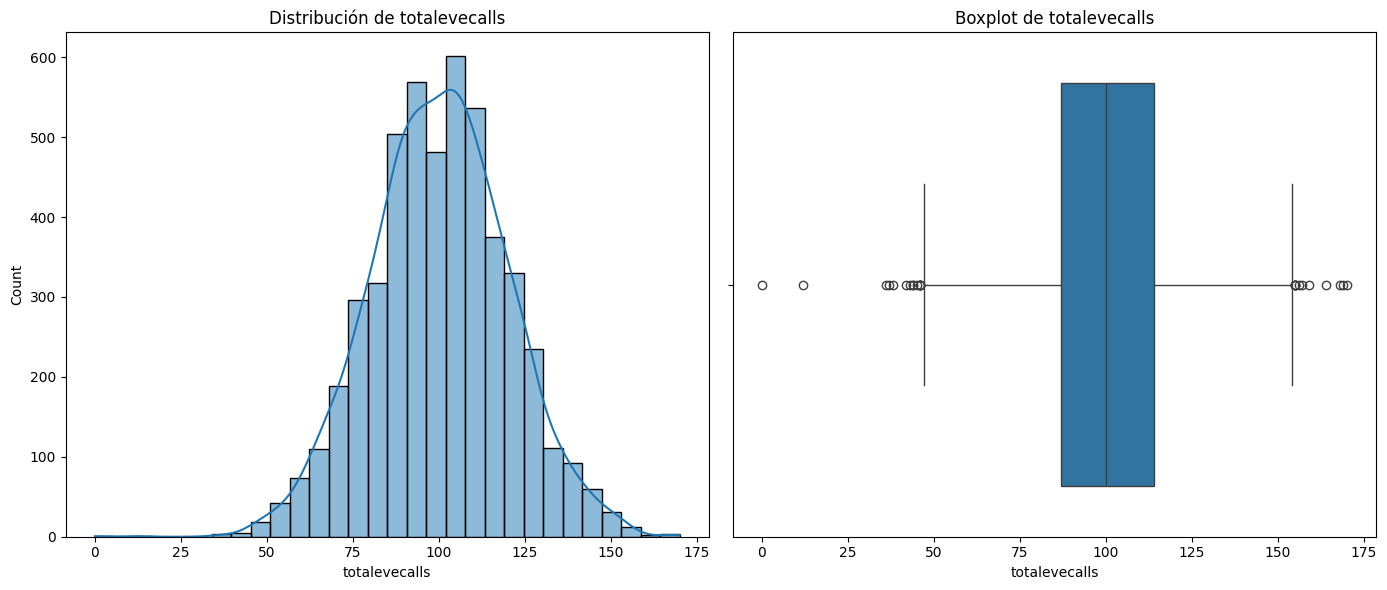

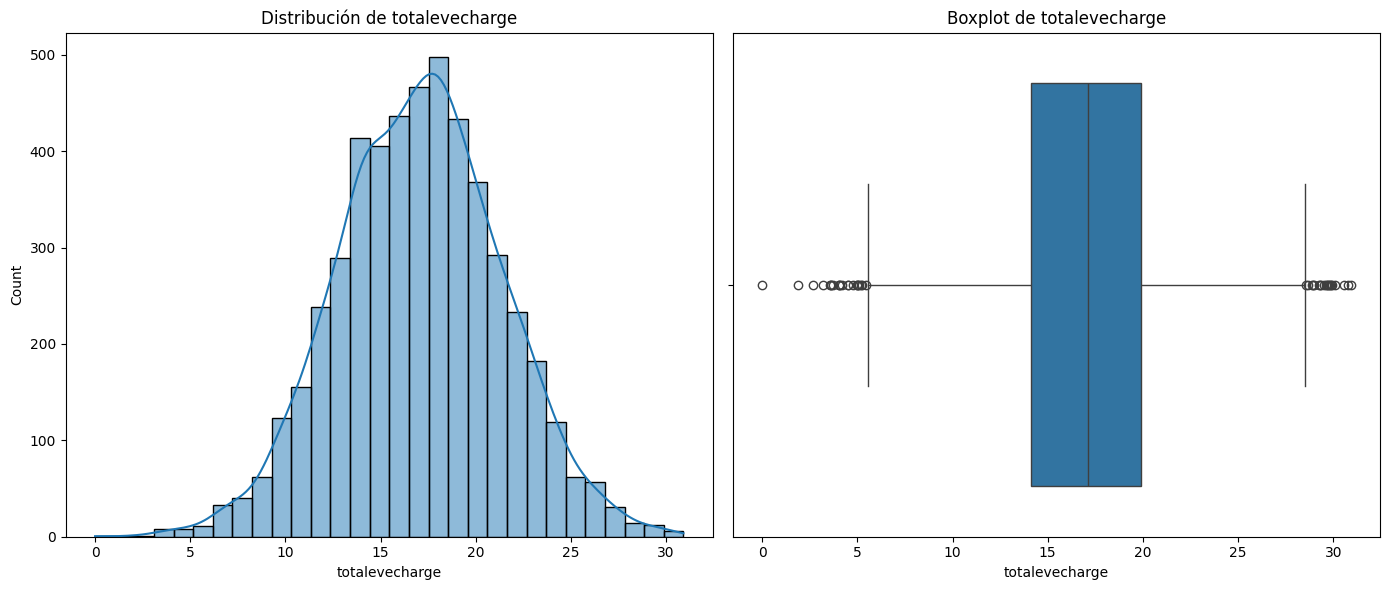

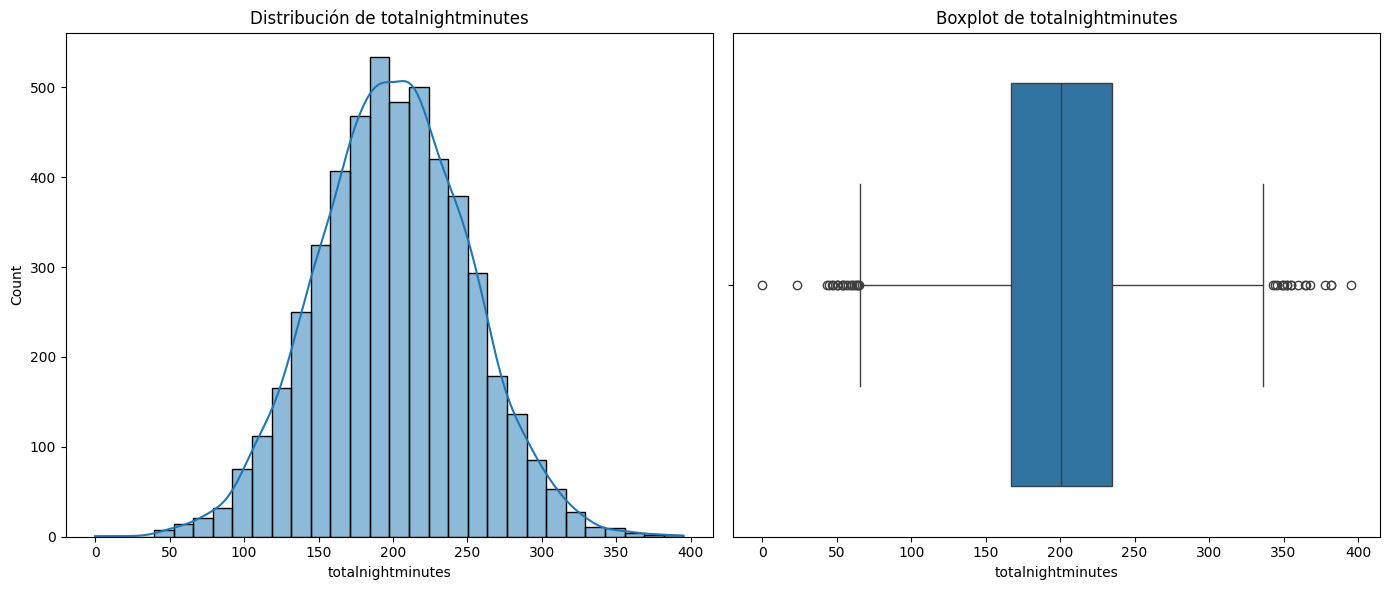

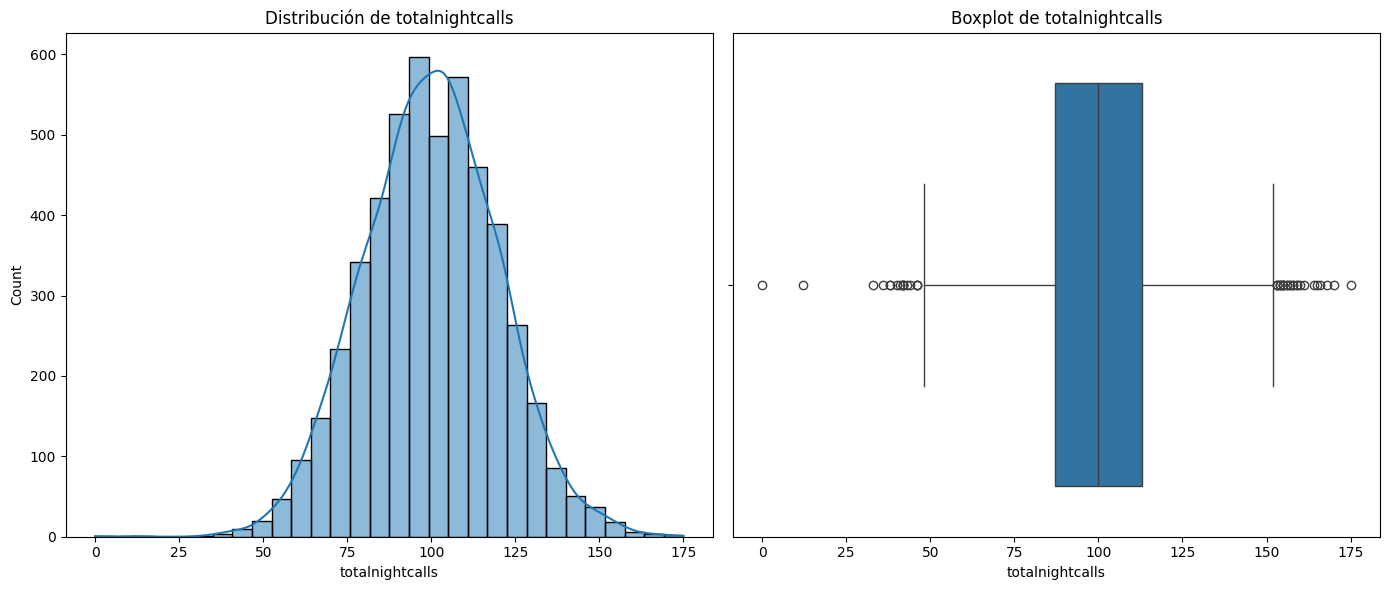

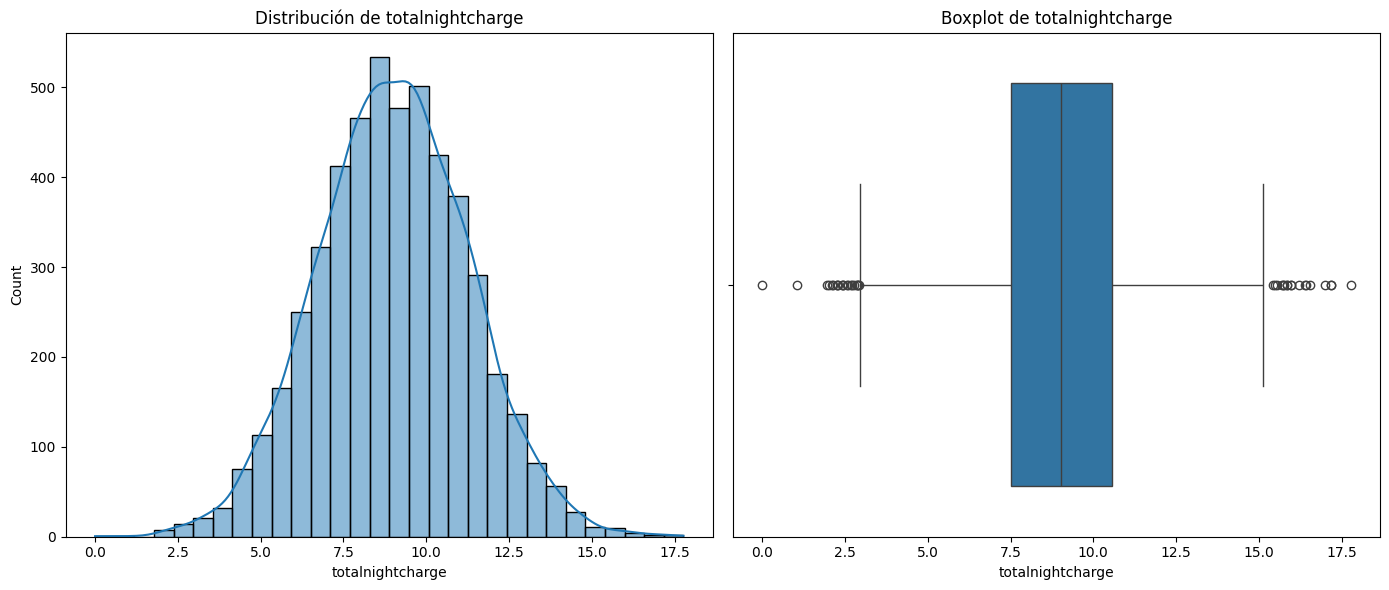

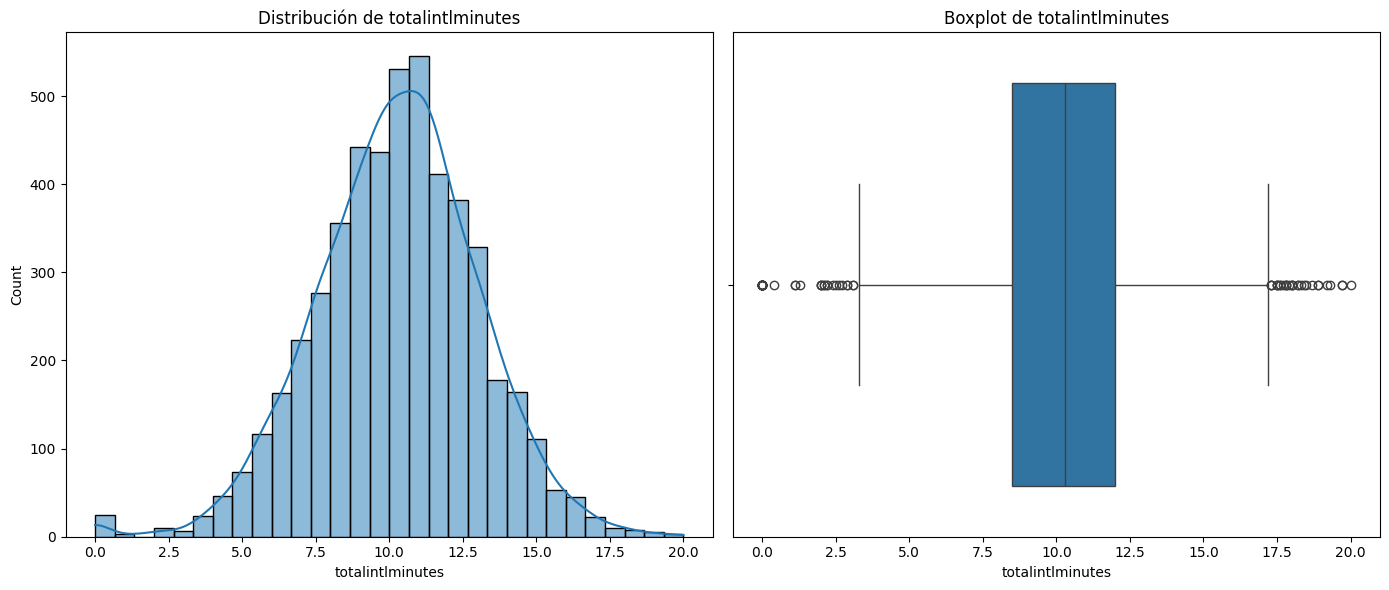

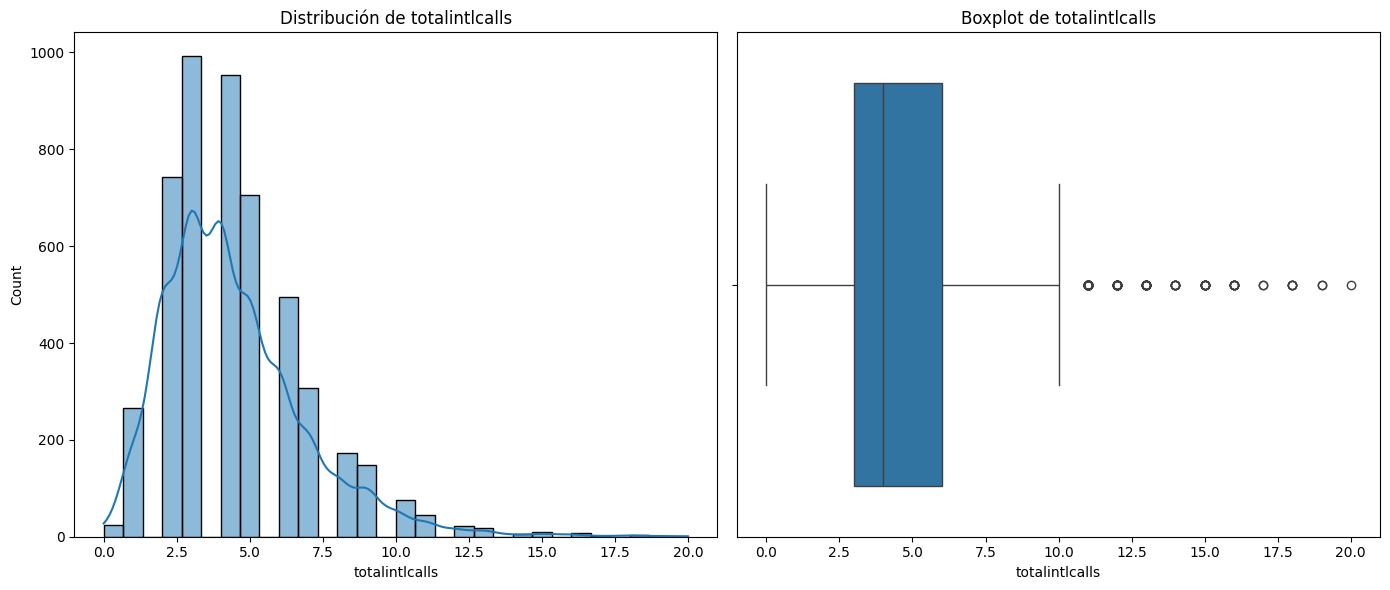

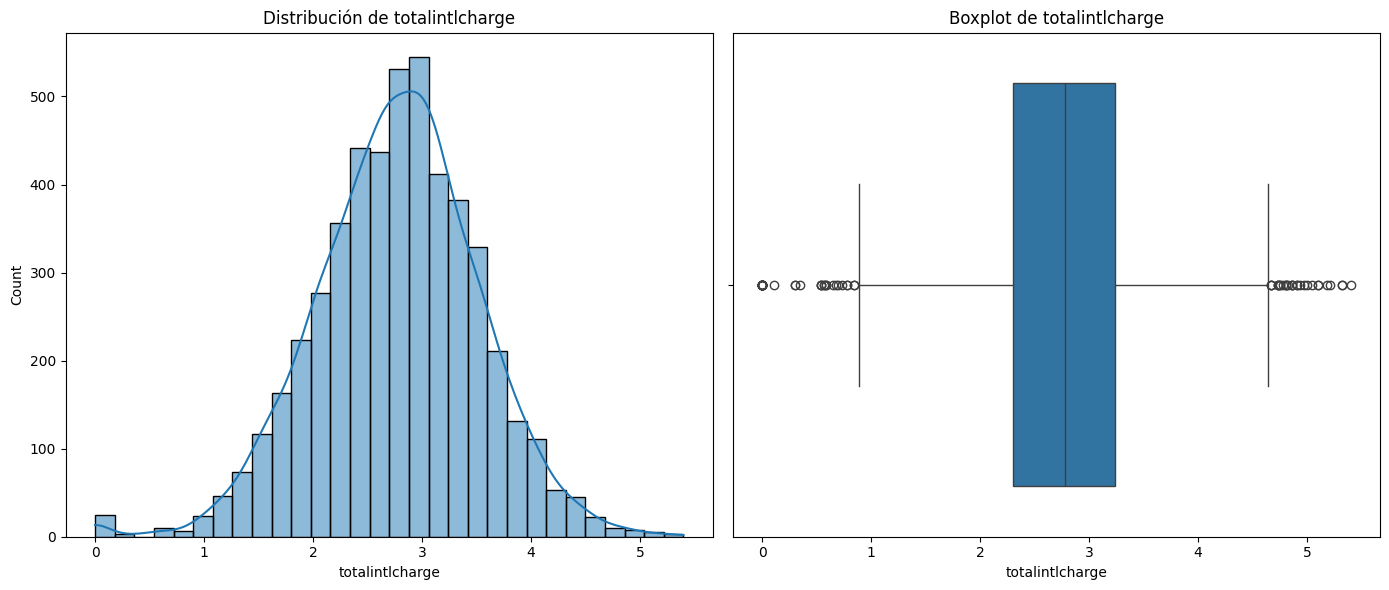

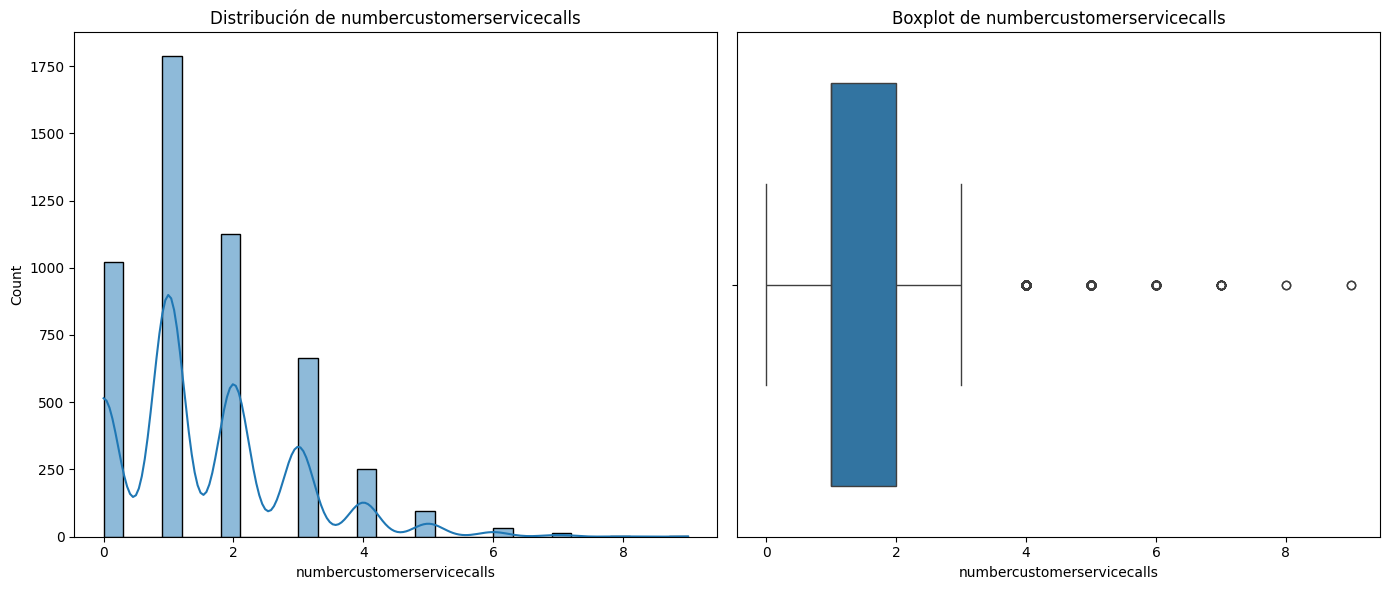

In [137]:
# Histograma y distribución de datos
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(14, 6))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

In [138]:
# Comprobación de asimetría y normalidad
for col in num_cols:
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    print(f"{col}:")
    print(f"  Asimetría (Skewness): {skewness:.2f}")
    print(f"  Curtosis: {kurt:.2f}")

accountlength:
  Asimetría (Skewness): 0.11
  Curtosis: -0.10
numbervmailmessages:
  Asimetría (Skewness): 1.35
  Curtosis: 0.20
totaldayminutes:
  Asimetría (Skewness): -0.01
  Curtosis: -0.02
totaldaycalls:
  Asimetría (Skewness): -0.08
  Curtosis: 0.18
totaldaycharge:
  Asimetría (Skewness): -0.01
  Curtosis: -0.02
totaleveminutes:
  Asimetría (Skewness): -0.01
  Curtosis: 0.05
totalevecalls:
  Asimetría (Skewness): -0.02
  Curtosis: 0.12
totalevecharge:
  Asimetría (Skewness): -0.01
  Curtosis: 0.05
totalnightminutes:
  Asimetría (Skewness): 0.02
  Curtosis: 0.08
totalnightcalls:
  Asimetría (Skewness): 0.00
  Curtosis: 0.14
totalnightcharge:
  Asimetría (Skewness): 0.02
  Curtosis: 0.08
totalintlminutes:
  Asimetría (Skewness): -0.21
  Curtosis: 0.65
totalintlcalls:
  Asimetría (Skewness): 1.36
  Curtosis: 3.26
totalintlcharge:
  Asimetría (Skewness): -0.21
  Curtosis: 0.65
numbercustomerservicecalls:
  Asimetría (Skewness): 1.04
  Curtosis: 1.48


## 4. Análisis bivariado

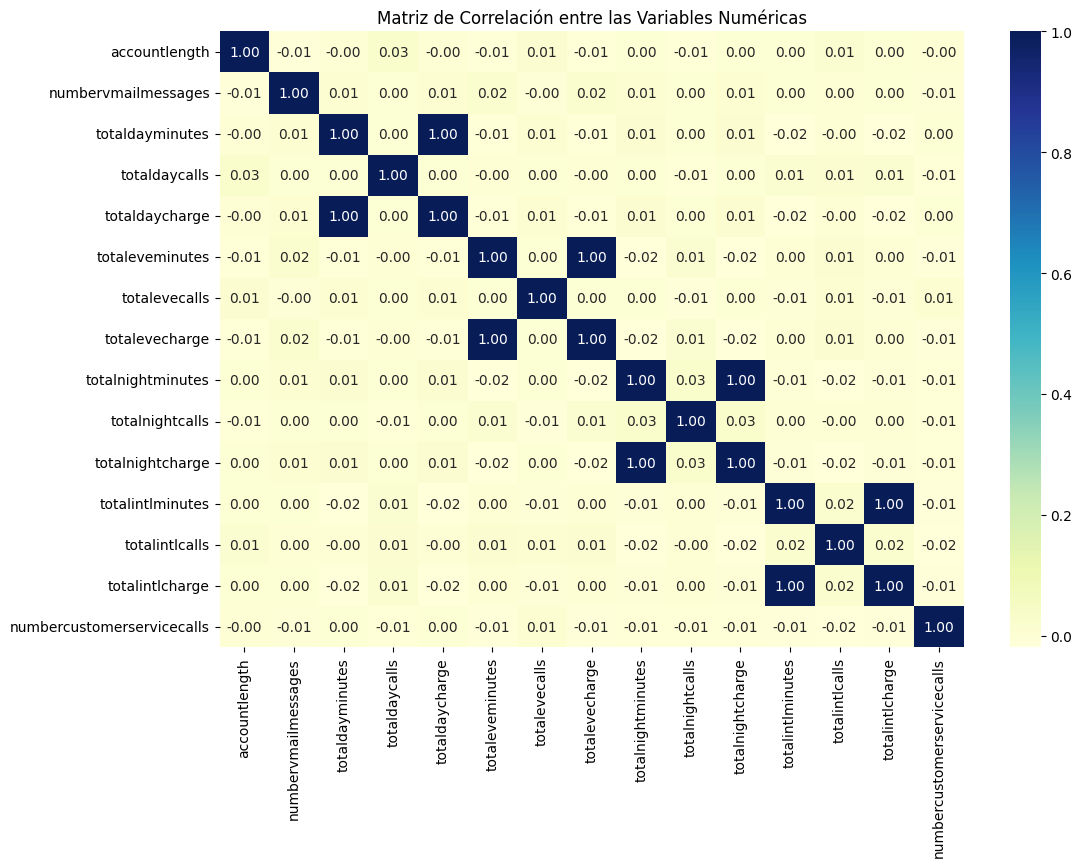

In [139]:
# Matriz de correlación con mapa de calor utilizando matplotlib

# Filtrar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crear matriz de correlación con el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Matriz de Correlación entre las Variables Numéricas")
plt.show()

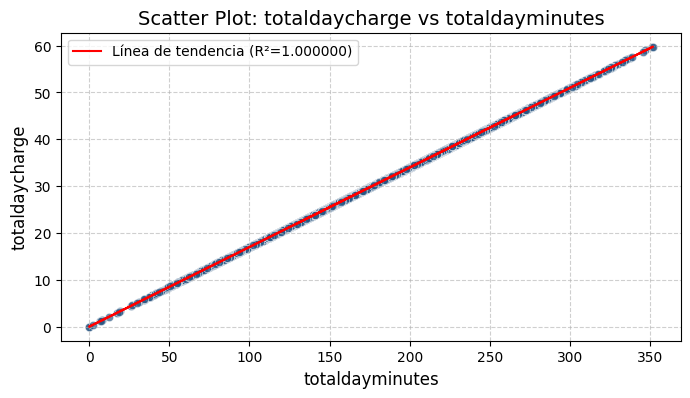

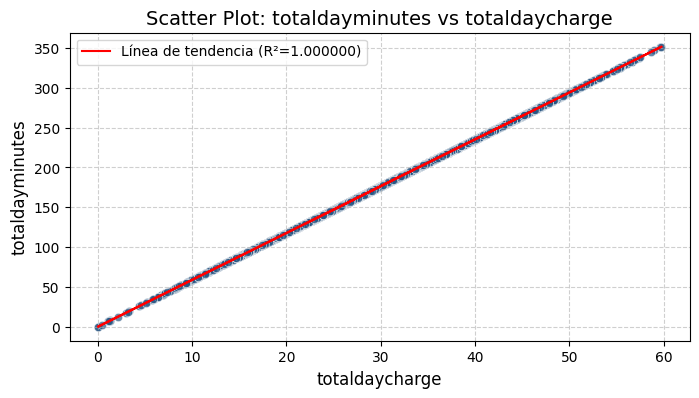

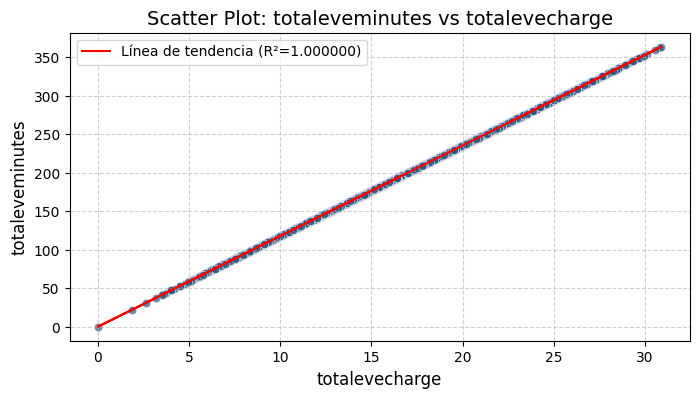

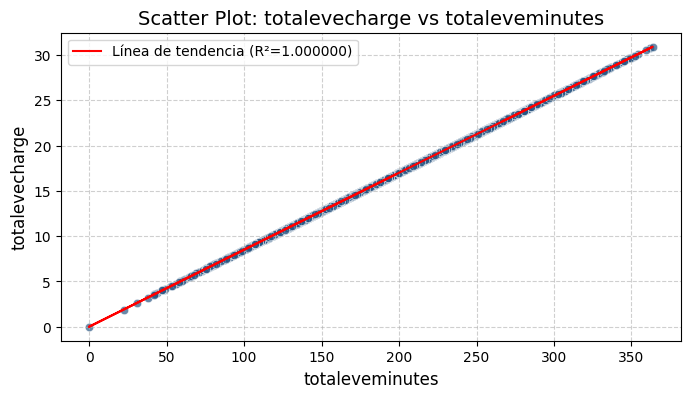

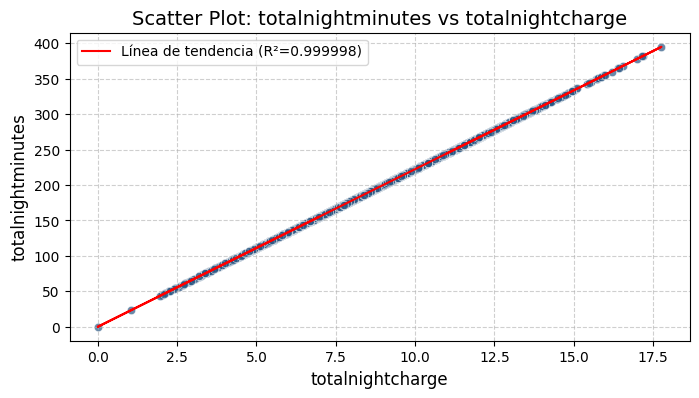

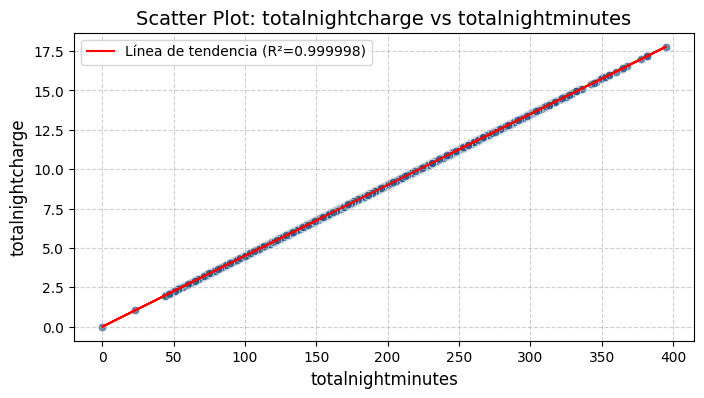

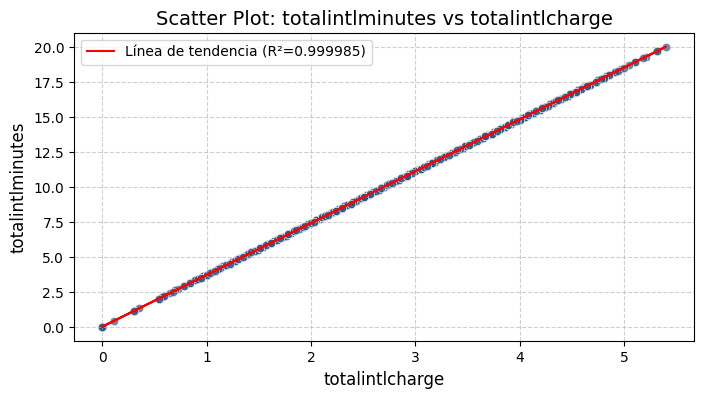

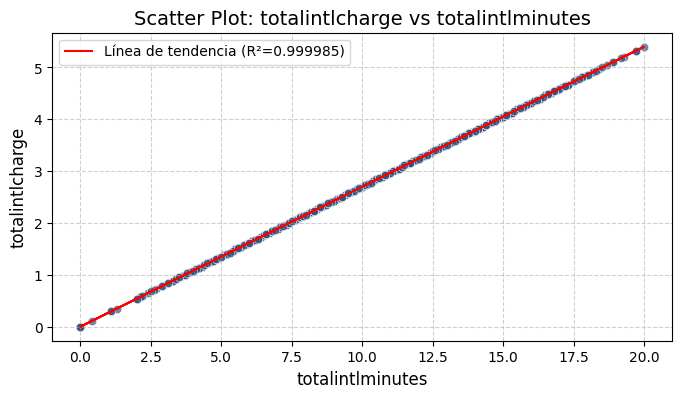

In [140]:
# Función reutilizable para graficar la dispersión entre dos variables numéricas
def scatter_plot(df, column_x, column_y, title=None, color="#2A5783", alpha=0.7, trendline=True):
    # Validaciones de existencia de columnas
    if column_x not in df.columns:
        raise ValueError(f"La columna '{column_x}' no existe en el DataFrame.")
    if column_y not in df.columns:
        raise ValueError(f"La columna '{column_y}' no existe en el DataFrame.")

    # Generar el gráfico
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=column_x, y=column_y, color=color, alpha=alpha)

    if trendline:
        x = df[column_x]
        y = df[column_y]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        plt.plot(x, slope * x + intercept, color='red', label=f'Línea de tendencia (R²={r_value**2:.6f})')
        plt.legend()

    # Configuración del título y etiquetas
    plt.title(title if title else f"Gráfico de Dispersión: {column_y} vs {column_x}", fontsize=14)
    plt.xlabel(column_x, fontsize=12)
    plt.ylabel(column_y, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# En base a los resultados de la matriz de correlación se obtienen las variables más correlacionadas
relevant_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Filtrar relaciones con una correlación mayor a 0.5 y evitar duplicados o relaciones consigo mismas
relevant_pairs = relevant_pairs[(abs(relevant_pairs) > 0.5) & (relevant_pairs.index.get_level_values(0) != relevant_pairs.index.get_level_values(1))]

# Mostrar las relaciones identificadas entre variables numéricas
for pair in relevant_pairs.index:
    scatter_plot(
        df=df,
        column_x=pair[0],
        column_y=pair[1],
        title=f"Scatter Plot: {pair[1]} vs {pair[0]}"
    )

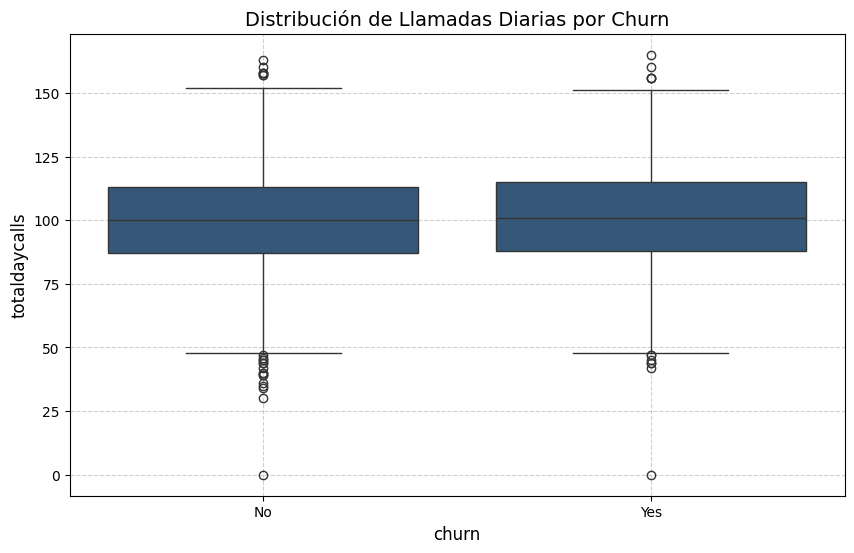

In [141]:
# Función reutilizable para grafica boxplots para mostrar la distribución númerica entre las variables categoricas
def plot_boxplot(df, categorical_column, numerical_column, title=None, color="#2A5783", orient="v"):
    # Validaciones de existencia de columnas
    if categorical_column not in df.columns:
        raise ValueError(f"La columna categórica '{categorical_column}' no existe en el DataFrame.")
    if numerical_column not in df.columns:
        raise ValueError(f"La columna numérica '{numerical_column}' no existe en el DataFrame.")

    # Generar el gráfico
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df,
        x=categorical_column if orient == "v" else numerical_column,
        y=numerical_column if orient == "v" else categorical_column,
        color=color
    )
    plt.title(title if title else f"Boxplot de {numerical_column} por {categorical_column}", fontsize=14)
    plt.xlabel(categorical_column if orient == "v" else numerical_column, fontsize=12)
    plt.ylabel(numerical_column if orient == "v" else categorical_column, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Ejemplo utilizando variable dicotomica, debido a que no existen categoricas
plot_boxplot(
    df=df,
    categorical_column="churn",
    numerical_column="totaldaycalls",
    title="Distribución de Llamadas Diarias por Churn"
)

## 5. Análisis de distribuciones y sesgos

In [ ]:
# Comprobación de sesgo en los datos